In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [155]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [157]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [158]:
df.duplicated().sum()

0

In [159]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [160]:
# Encoding & Scaling data
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Define column groups
numerical_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
multi_cat_cols = ['furnishingstatus']

# Check for missing values in key columns
print("🔍 Missing values check:\n")
print("Numerical:\n ",df[numerical_cols].isnull().sum(),'\n')
print("Binary:\n  ",df[binary_cols].isnull().sum(),'\n')
print("Multi-category:\n  ",df[multi_cat_cols].isnull().sum())
print()

# Convert binary yes/no to 1/0
print("🔧 Converting binary columns...")
df[binary_cols] = df[binary_cols].apply(lambda col: col.map({'yes': 1, 'no': 0}))
print("✅ Binary conversion complete.\n")

# One-hot encode multi-category columns
print("🎯 Encoding multi-category columns...")
encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
encoded = encoder.fit_transform(df[multi_cat_cols])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(multi_cat_cols), index=df.index)
print(f"✅ Encoded shape: {encoded_df.shape}\n")

# Scale numerical columns
print("📏 Scaling numerical columns...")
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[numerical_cols])
scaled_df = pd.DataFrame(scaled, columns=numerical_cols, index=df.index)
print(f"✅ Scaled shape: {scaled_df.shape}\n")

# Check for column name overlaps
print("🧠 Checking for column name overlaps...")
overlap = set(scaled_df.columns) & set(df[binary_cols].columns) & set(encoded_df.columns)
if overlap:
    print("⚠️ Overlapping columns found:", overlap)
else:
    print("✅ No column name overlaps.\n")

# Final concatenation
print("🔗 Concatenating all processed data...")
final_df = pd.concat([scaled_df, df[binary_cols], encoded_df], axis=1)
final_df

🔍 Missing values check:

Numerical:
  price        0
area         0
bedrooms     0
bathrooms    0
stories      0
parking      0
dtype: int64 

Binary:
   mainroad           0
guestroom          0
basement           0
hotwaterheating    0
airconditioning    0
prefarea           0
dtype: int64 

Multi-category:
   furnishingstatus    0
dtype: int64

🔧 Converting binary columns...
✅ Binary conversion complete.

🎯 Encoding multi-category columns...
✅ Encoded shape: (545, 2)

📏 Scaling numerical columns...
✅ Scaled shape: (545, 6)

🧠 Checking for column name overlaps...
✅ No column name overlaps.

🔗 Concatenating all processed data...


,price,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.000000,0.396564,0.6,0.333333,0.666667,0.666667,1,0,0,0,1,1,0.0,0.0
1,0.909091,0.502405,0.6,1.000000,1.000000,1.000000,1,0,0,0,1,0,0.0,0.0
2,0.909091,0.571134,0.4,0.333333,0.333333,0.666667,1,0,1,0,0,1,1.0,0.0
3,0.906061,0.402062,0.6,0.333333,0.333333,1.000000,1,0,1,0,1,1,0.0,0.0
4,0.836364,0.396564,0.6,0.000000,0.333333,0.666667,1,1,1,0,1,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.006061,0.092784,0.2,0.000000,0.000000,0.666667,1,0,1,0,0,0,0.0,1.0
541,0.001485,0.051546,0.4,0.000000,0.000000,0.000000,0,0,0,0,0,0,1.0,0.0
542,0.000000,0.135395,0.2,0.000000,0.000000,0.000000,1,0,0,0,0,0,0.0,1.0
543,0.000000,0.086598,0.4,0.000000,0.000000,0.000000,0,0,0,0,0,0,0.0,0.0


## 1. Simple Linear Regression

- Based on 'area' predict 'price' of the house

In [161]:
correlation = df[['area', 'price']].corr()
print("📈 Correlation between area and price:")
correlation

📈 Correlation between area and price:


,area,price
area,1.000000,0.535997
price,0.535997,1.000000


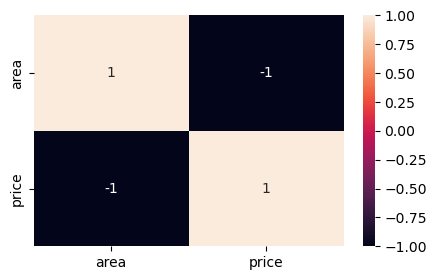

In [162]:
plt.figure(figsize=(5,3))
sns.heatmap(correlation.select_dtypes(include='number').corr(),annot=True)
plt.show()

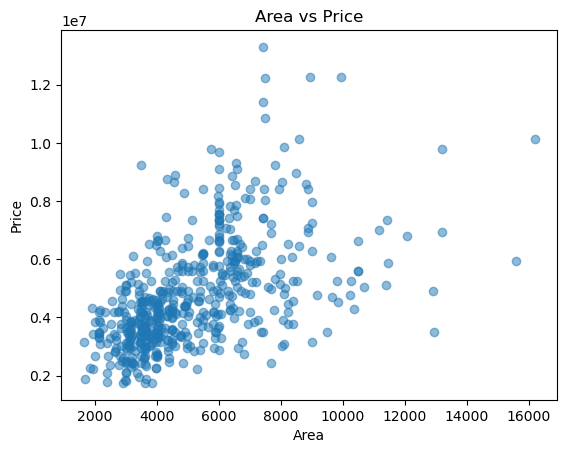

In [163]:
plt.scatter(df['area'], df['price'], alpha=0.5)
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Area vs Price')
plt.show()

In [164]:
# independent & dependent
X = df[['area']]  # Feature
y = df['price']   # Target

In [165]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [166]:
# Build the Simple Linear Regression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X, y)
model

LinearRegression()

In [167]:
# Predict
y_pred = model.predict(X_test)
y_pred

array([5112960.35860585, 5390145.29516952, 4253687.05525848,
       4697182.95376035, 4216729.06371665, 5491779.77190953,
       6323334.58160054, 4692563.20481762, 3884107.13984025,
       3634640.69693295, 6351053.07525691, 4204717.71646556,
       4105855.08909118, 3819430.65464206, 4221348.81265938,
       4064277.34860663, 3311258.270942  , 5159157.84803313,
       5089861.61389221, 5159157.84803313, 4706422.4516458 ,
       5540287.13580818, 4073054.87159782, 4142813.08063301,
       6198601.36014689, 6988578.42935335, 3814810.90569933,
       3773233.16521478, 8485377.08679717, 3773233.16521478,
       4235208.05948756, 3828670.15252751, 5159157.84803313,
       5443272.40801089, 4593238.60254897, 4512392.99605123,
       4533643.84118778, 3856388.64618388, 3994981.11446572,
       3674832.51273468, 6073868.13869324, 4064277.34860663,
       5353187.3036277 , 4327603.03834212, 5505639.01873772,
       5106030.73519176, 5159157.84803313, 4530871.99182214,
       6106206.38129234,

In [168]:
# Slop & Intercept
print("Slope (Weight) (Coefficient for area):", model.coef_[0])
print("Intercept (Bias):", model.intercept_)

Slope (Weight) (Coefficient for area): 461.97489427278316
Intercept (Bias): 2387308.4823964313


In [169]:
# Model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print(f"R² Score: {r2 * 100:.2f}%")

Mean Absolute Error: 1465106.7119208777
Mean Squared Error: 3584567853664.481
Root Mean Squared Error: 1893295.5008831772
R² Score: 29.08%


In [170]:
# Ensure y_test and y_pred are aligned
print("y_test shape:", y_test.shape)
print("y_pred shape:", y_pred.shape)

y_test shape: (109,)
y_pred shape: (109,)


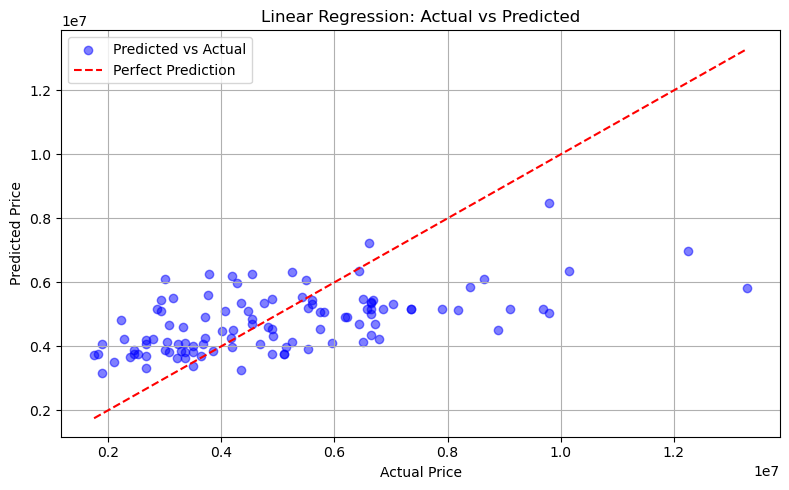

In [171]:
# Plot Actual vs Predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 2. Multiple Linear Regression

In [172]:
print("📈 Correlation :")
print(df.select_dtypes(include='number').corr())

📈 Correlation :
                    price      area  bedrooms  bathrooms   stories  mainroad  \
price            1.000000  0.535997  0.366494   0.517545  0.420712  0.296898   
area             0.535997  1.000000  0.151858   0.193820  0.083996  0.288874   
bedrooms         0.366494  0.151858  1.000000   0.373930  0.408564 -0.012033   
bathrooms        0.517545  0.193820  0.373930   1.000000  0.326165  0.042398   
stories          0.420712  0.083996  0.408564   0.326165  1.000000  0.121706   
mainroad         0.296898  0.288874 -0.012033   0.042398  0.121706  1.000000   
guestroom        0.255517  0.140297  0.080549   0.126469  0.043538  0.092337   
basement         0.187057  0.047417  0.097312   0.102106 -0.172394  0.044002   
hotwaterheating  0.093073 -0.009229  0.046049   0.067159  0.018847 -0.011781   
airconditioning  0.452954  0.222393  0.160603   0.186915  0.293602  0.105423   
parking          0.384394  0.352980  0.139270   0.177496  0.045547  0.204433   
prefarea         0.32977

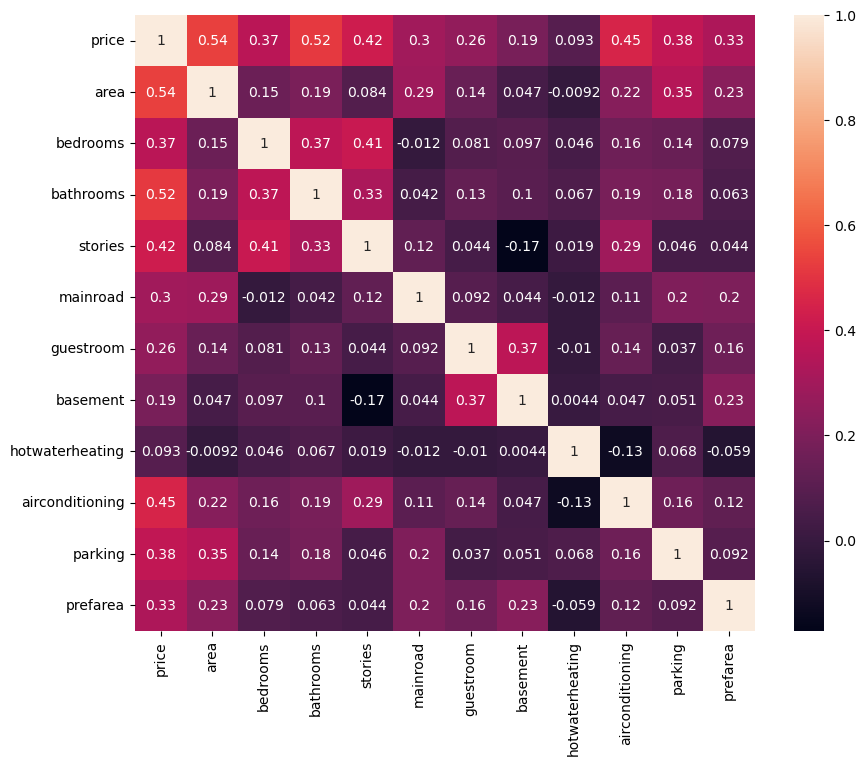

In [173]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True)
plt.show()

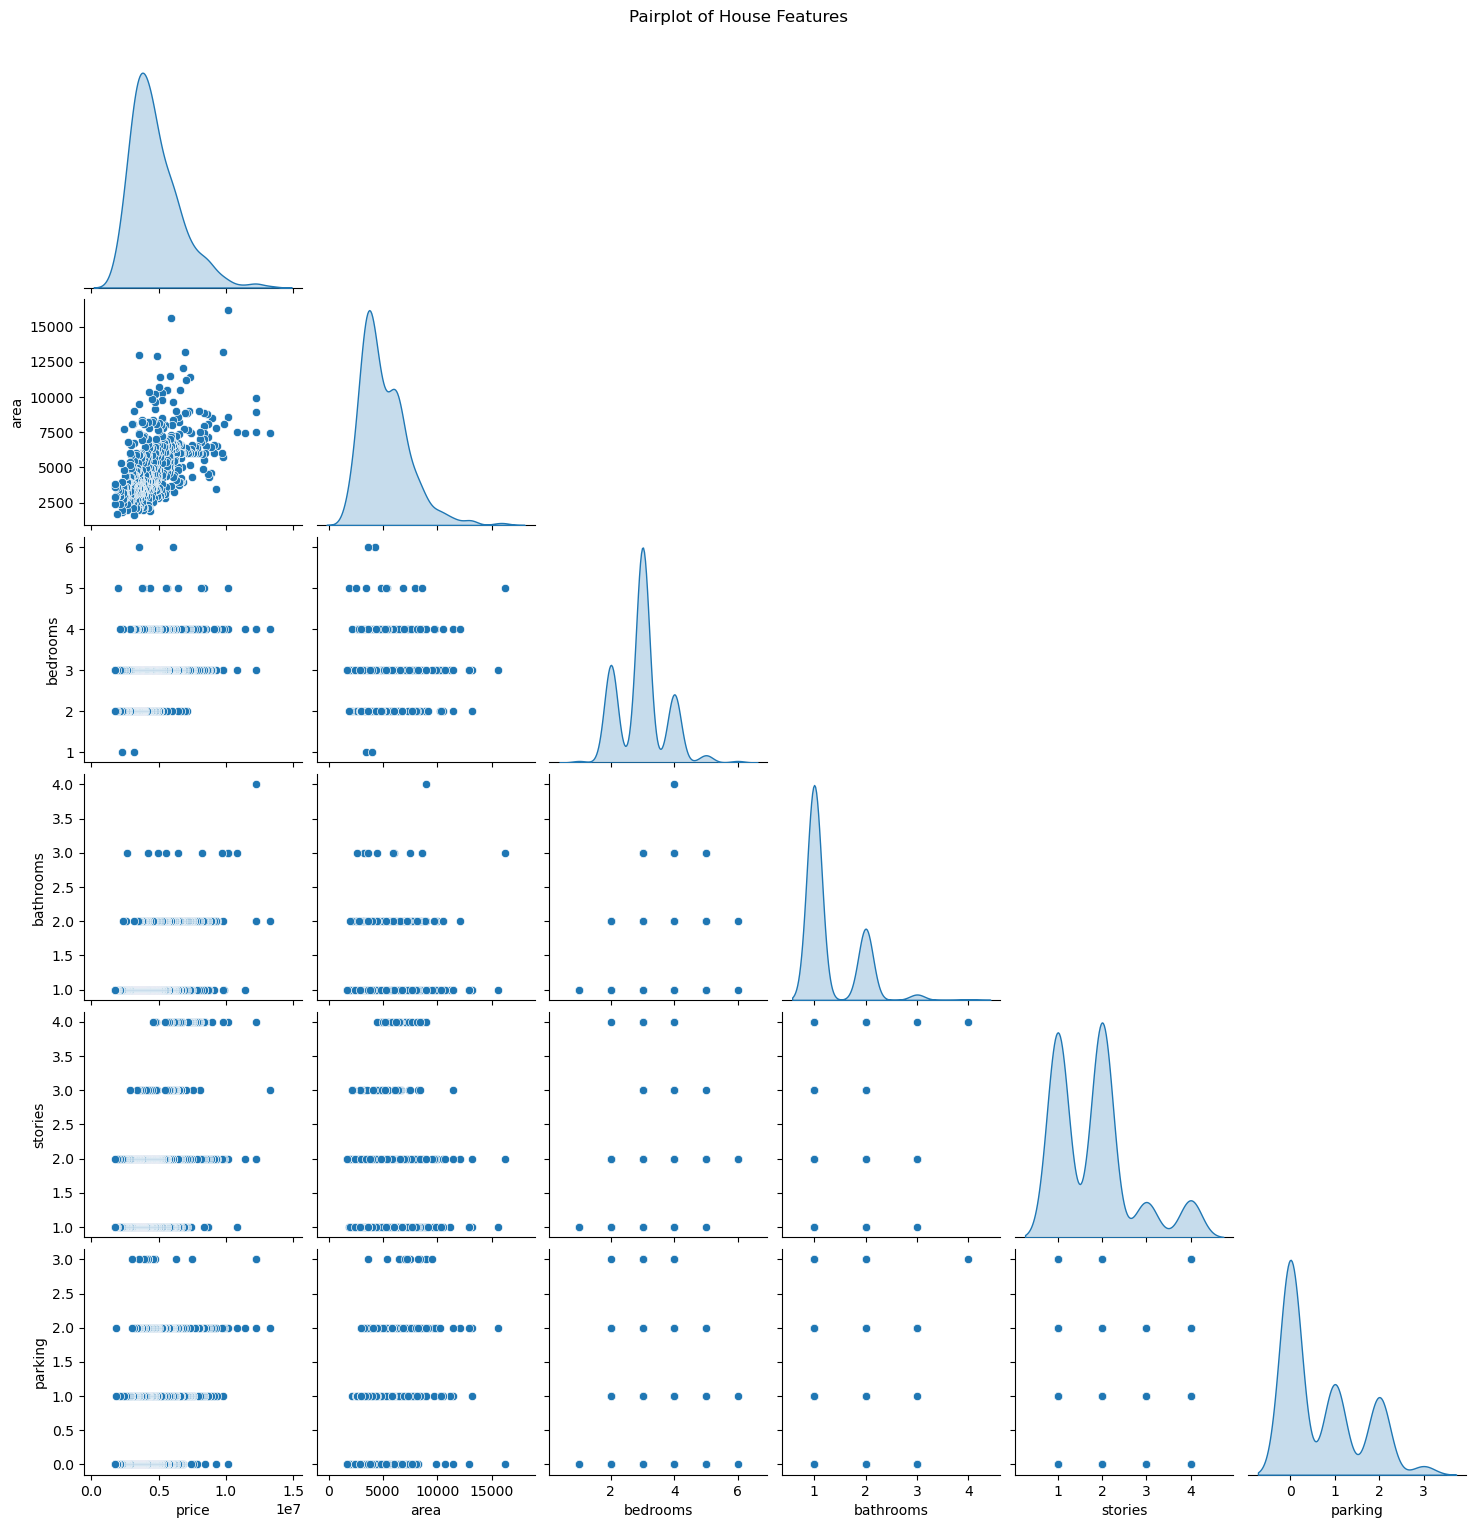

In [174]:
# Pairplot
selected_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
sns.pairplot(df[selected_cols], diag_kind='kde', corner=True)
plt.suptitle('Pairplot of House Features', y=1.02)
plt.show()

In [175]:
# Split data into independent & dependent 
X = final_df  # already encoded and scaled
y = df['price'] # Target

In [176]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [177]:
# Build the Multiple Linear Regression Model
from sklearn.linear_model import LinearRegression
multi_model = LinearRegression().fit(X_train, y_train)
multi_model

LinearRegression()

In [182]:
y_pred = multi_model.predict(X_test)
y_pred

array([ 4060000.,  6650000.,  3710000.,  6440000.,  2800000.,  4900000.,
        5250000.,  4543000.,  2450000.,  3353000., 10150000.,  2660000.,
        3360000.,  3360000.,  2275000.,  2660000.,  2660000.,  7350000.,
        2940000.,  2870000.,  6720000.,  5425000.,  1890000.,  5250000.,
        4193000., 12250000.,  3080000.,  5110000.,  9800000.,  2520000.,
        6790000.,  3500000.,  6650000.,  2940000.,  3325000.,  4200000.,
        4900000.,  3290000.,  3500000.,  2380000.,  5495000.,  3675000.,
        6650000.,  4907000.,  3150000.,  4480000.,  6580000.,  5740000.,
        3003000.,  1820000.,  8400000.,  2450000.,  4270000.,  4007500.,
        3234000.,  1750000.,  9800000.,  2100000.,  4340000.,  3045000.,
        3850000.,  3500000.,  4753000.,  3080000.,  4550000.,  6510000.,
        6685000.,  5110000.,  4550000.,  6650000.,  3640000.,  5600000.,
        3780000.,  6615000.,  3220000.,  6650000.,  4690000.,  4830000.,
        6860000.,  2233000.,  7035000.,  4165000., 

In [183]:
print("Intercept:", multi_model.intercept_,'\n')
print("Coefficients:")
for feature, coef in zip(X.columns, multi_model.coef_):
    print(f"{feature}: {coef}")

Intercept: 1749999.999999999 

Coefficients:
price: 11549999.999999998
area: -1.0543365092886773e-09
bedrooms: 3.6074600614408814e-10
bathrooms: -1.9547319262532594e-09
stories: 1.8445504743158434e-09
parking: 2.0113094172752105e-09
mainroad: 5.989461823596069e-10
guestroom: -1.5089998501200003e-09
basement: 2.237216341803214e-09
hotwaterheating: 4.442650175513602e-10
airconditioning: 3.8186069375562884e-10
prefarea: 3.9731000885490533e-10
furnishingstatus_semi-furnished: -3.7257449228820526e-10
furnishingstatus_unfurnished: -5.591252065886281e-10


In [184]:
print("y_test shape:", y_test.shape)
print("y_pred shape:", y_pred.shape)

y_test shape: (109,)
y_pred shape: (109,)


In [189]:
# Model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print(f"R² Score: {r2 * 100:.2f}%")

Mean Absolute Error: 9.78315915536443e-10
Mean Squared Error: 1.7934096486159307e-18
Root Mean Squared Error: 1.3391824553121695e-09
R² Score: 100.00%


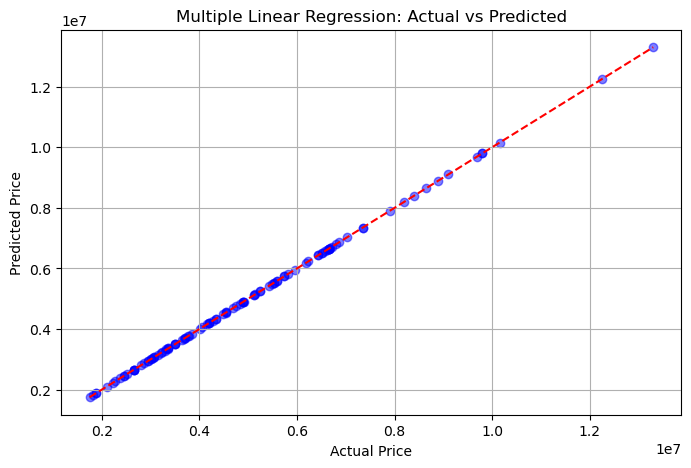

In [190]:
# Plot Actual vs Predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # perfect prediction line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Multiple Linear Regression: Actual vs Predicted')
plt.grid(True)
plt.show()

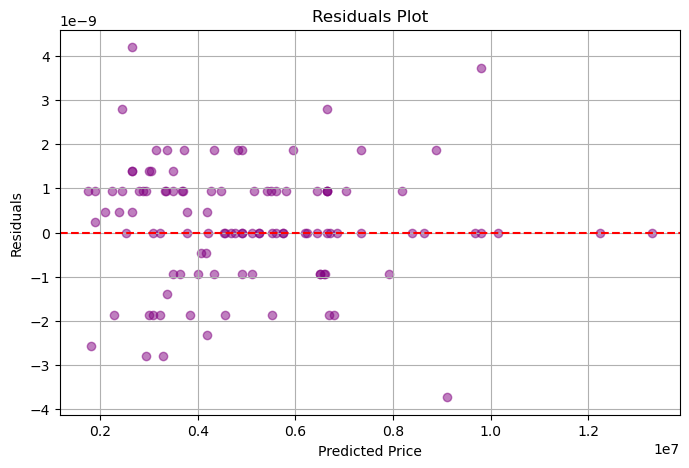

In [191]:
# Calculate residuals
residuals = y_test - y_pred

# residuals plot
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, alpha=0.5, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid(True)
plt.show()